In [5]:
# Importando bibliotecas
from urllib.request import urlopen, urlretrieve
from bs4 import BeautifulSoup
import pandas as pd

# Declarando variável cards
cards = []

## Obtendo o HTML e o total de páginas
response = urlopen('https://alura-site-scraping.herokuapp.com/index.php')
html = response.read().decode('utf-8')
soup = BeautifulSoup(html, 'html.parser')
pages = int(soup.find('span', class_="info-pages").get_text().split()[-1])

## Iterando por todas as páginas do site
for i in range(pages):
    ## Obtendo o HTML
    response = urlopen('https://alura-site-scraping.herokuapp.com/index.php?page=' + str(i + 1))
    html = response.read().decode('utf-8')
    soup = BeautifulSoup(html, 'html.parser')

    # Obtendo as TAGs de interesse
    anuncios = soup.find('div', {"id": "container-cards"}).findAll('div', class_="card")

    # Coletando as informações dos CARDS
    for anuncio in anuncios:
        card = {}

        # Valor
        card['value'] = anuncio.find('p', {'class': 'txt-value'}).getText()

        # Informações
        infos = anuncio.find('div', {'class': 'body-card'}).findAll('p')
        for info in infos:
            card[info.get('class')[0].split('-')[-1]] = info.get_text()

        # Acessórios
        items = anuncio.find('div', {'class': 'body-card'}).ul.findAll('li')
        items.pop()
        acessorios = []
        for item in items:
            acessorios.append(item.get_text().replace('► ', ''))
        card['items'] = acessorios

        # Adicionando resultado a lista cards
        cards.append(card)

        # Imagens
        #image = anuncio.find('div', {'class': 'image-card'}).img
        #urlretrieve(image.get('src'), './output/img/' + image.get('src').split('/')[-1])     


# Criando um DataFrame com os resultados
dataset = pd.DataFrame(cards)
dataset.to_csv('./output/data/dataset.csv', sep=';', index = False, encoding = 'utf-8-sig')
dataset

,value,name,category,motor,description,location,items,opportunity
0,R$ 338.000,LAMBORGHINI AVENTADOR,USADO,Motor 1.8 16v,Ano 1993 - 55.286 km,Belo Horizonte - MG,"[4 X 4, Câmera de estacionamento, Controle de ...",NaN
1,R$ 346.000,BMW M2,USADO,Motor 3.0 32v,Ano 2018 - 83.447 km,Belo Horizonte - MG,"[Câmera de estacionamento, Controle de estabil...",NaN
2,R$ 480.000,ALFA,USADO,Motor 1.8 16v,Ano 2004 - 19.722 km,Rio de Janeiro - RJ,"[Central multimídia, Bancos de couro, Rodas de...",NaN
3,R$ 133.000,PUECH,USADO,Motor Diesel V8,Ano 1992 - 34.335 km,São Paulo - SP,"[Bancos de couro, Freios ABS, Rodas de liga, C...",NaN
4,R$ 175.000,LAMBORGHINI MURCIELAGO,USADO,Motor 1.0 8v,Ano 1991 - 464 km,Belo Horizonte - MG,"[Central multimídia, Teto panorâmico, Sensor c...",NaN
...,...,...,...,...,...,...,...,...
241,R$ 489.000,SUV REAR TIRE,USADO,Motor 3.0 32v,Ano 1998 - 74.292 km,São Paulo - SP,"[Câmera de estacionamento, Rodas de liga, Sens...",NaN
242,R$ 427.000,ANTIQUE,NOVO,Motor 2.0 16v,Ano 2019 - 0 km,Belo Horizonte - MG,"[Bancos de couro, Freios ABS, Sensor de estaci...",NaN
243,R$ 203.000,SPORT,USADO,Motor 2.0 16v,Ano 2001 - 102.776 km,Belo Horizonte - MG,"[Sensor crepuscular, Sensor de chuva, Vidros e...",NaN
244,R$ 474.000,IMPERIAL,USADO,Motor 1.8 16v,Ano 2011 - 101.787 km,Belo Horizonte - MG,"[Painel digital, Travas elétricas, Sensor de c...",OPORTUNIDADE


In [71]:
df = dataset.copy()

In [72]:
df.head()

,value,name,category,motor,description,location,items,opportunity
0,R$ 338.000,LAMBORGHINI AVENTADOR,USADO,Motor 1.8 16v,Ano 1993 - 55.286 km,Belo Horizonte - MG,"[4 X 4, Câmera de estacionamento, Controle de ...",NaN
1,R$ 346.000,BMW M2,USADO,Motor 3.0 32v,Ano 2018 - 83.447 km,Belo Horizonte - MG,"[Câmera de estacionamento, Controle de estabil...",NaN
2,R$ 480.000,ALFA,USADO,Motor 1.8 16v,Ano 2004 - 19.722 km,Rio de Janeiro - RJ,"[Central multimídia, Bancos de couro, Rodas de...",NaN
3,R$ 133.000,PUECH,USADO,Motor Diesel V8,Ano 1992 - 34.335 km,São Paulo - SP,"[Bancos de couro, Freios ABS, Rodas de liga, C...",NaN
4,R$ 175.000,LAMBORGHINI MURCIELAGO,USADO,Motor 1.0 8v,Ano 1991 - 464 km,Belo Horizonte - MG,"[Central multimídia, Teto panorâmico, Sensor c...",NaN


In [73]:
df = df.set_index('name')
df.head()

,value,category,motor,description,location,items,opportunity
name,,,,,,,
LAMBORGHINI AVENTADOR,R$ 338.000,USADO,Motor 1.8 16v,Ano 1993 - 55.286 km,Belo Horizonte - MG,"[4 X 4, Câmera de estacionamento, Controle de ...",NaN
BMW M2,R$ 346.000,USADO,Motor 3.0 32v,Ano 2018 - 83.447 km,Belo Horizonte - MG,"[Câmera de estacionamento, Controle de estabil...",NaN
ALFA,R$ 480.000,USADO,Motor 1.8 16v,Ano 2004 - 19.722 km,Rio de Janeiro - RJ,"[Central multimídia, Bancos de couro, Rodas de...",NaN
PUECH,R$ 133.000,USADO,Motor Diesel V8,Ano 1992 - 34.335 km,São Paulo - SP,"[Bancos de couro, Freios ABS, Rodas de liga, C...",NaN
LAMBORGHINI MURCIELAGO,R$ 175.000,USADO,Motor 1.0 8v,Ano 1991 - 464 km,Belo Horizonte - MG,"[Central multimídia, Teto panorâmico, Sensor c...",NaN


In [74]:
df.dtypes

value          object
category       object
motor          object
description    object
location       object
items          object
opportunity    object
dtype: object

In [75]:
texto="Belo Horizonte - MG"
separado = texto.split('-')
print( separado[0] )

Belo Horizonte 


In [76]:
df['city'] = df['location']
df['state'] = df['location']

In [77]:
df = df.drop(columns=['location'])

In [78]:
df.head()

,value,category,motor,description,items,opportunity,city,state
name,,,,,,,,
LAMBORGHINI AVENTADOR,R$ 338.000,USADO,Motor 1.8 16v,Ano 1993 - 55.286 km,"[4 X 4, Câmera de estacionamento, Controle de ...",NaN,Belo Horizonte - MG,Belo Horizonte - MG
BMW M2,R$ 346.000,USADO,Motor 3.0 32v,Ano 2018 - 83.447 km,"[Câmera de estacionamento, Controle de estabil...",NaN,Belo Horizonte - MG,Belo Horizonte - MG
ALFA,R$ 480.000,USADO,Motor 1.8 16v,Ano 2004 - 19.722 km,"[Central multimídia, Bancos de couro, Rodas de...",NaN,Rio de Janeiro - RJ,Rio de Janeiro - RJ
PUECH,R$ 133.000,USADO,Motor Diesel V8,Ano 1992 - 34.335 km,"[Bancos de couro, Freios ABS, Rodas de liga, C...",NaN,São Paulo - SP,São Paulo - SP
LAMBORGHINI MURCIELAGO,R$ 175.000,USADO,Motor 1.0 8v,Ano 1991 - 464 km,"[Central multimídia, Teto panorâmico, Sensor c...",NaN,Belo Horizonte - MG,Belo Horizonte - MG


In [79]:
df['year'] = df['description']
df['mileage'] = df['description']

In [80]:
df = df.drop(columns=['description'])

df.head()

,value,category,motor,items,opportunity,city,state,year,mileage
name,,,,,,,,,
LAMBORGHINI AVENTADOR,R$ 338.000,USADO,Motor 1.8 16v,"[4 X 4, Câmera de estacionamento, Controle de ...",NaN,Belo Horizonte - MG,Belo Horizonte - MG,Ano 1993 - 55.286 km,Ano 1993 - 55.286 km
BMW M2,R$ 346.000,USADO,Motor 3.0 32v,"[Câmera de estacionamento, Controle de estabil...",NaN,Belo Horizonte - MG,Belo Horizonte - MG,Ano 2018 - 83.447 km,Ano 2018 - 83.447 km
ALFA,R$ 480.000,USADO,Motor 1.8 16v,"[Central multimídia, Bancos de couro, Rodas de...",NaN,Rio de Janeiro - RJ,Rio de Janeiro - RJ,Ano 2004 - 19.722 km,Ano 2004 - 19.722 km
PUECH,R$ 133.000,USADO,Motor Diesel V8,"[Bancos de couro, Freios ABS, Rodas de liga, C...",NaN,São Paulo - SP,São Paulo - SP,Ano 1992 - 34.335 km,Ano 1992 - 34.335 km
LAMBORGHINI MURCIELAGO,R$ 175.000,USADO,Motor 1.0 8v,"[Central multimídia, Teto panorâmico, Sensor c...",NaN,Belo Horizonte - MG,Belo Horizonte - MG,Ano 1991 - 464 km,Ano 1991 - 464 km


In [83]:
df[['city', 'state']] = df.city.str.split('-', expand=True)

In [84]:
df.head()

,value,category,motor,items,opportunity,city,state,year,mileage
name,,,,,,,,,
LAMBORGHINI AVENTADOR,R$ 338.000,USADO,Motor 1.8 16v,"[4 X 4, Câmera de estacionamento, Controle de ...",NaN,Belo Horizonte,MG,Ano 1993 - 55.286 km,Ano 1993 - 55.286 km
BMW M2,R$ 346.000,USADO,Motor 3.0 32v,"[Câmera de estacionamento, Controle de estabil...",NaN,Belo Horizonte,MG,Ano 2018 - 83.447 km,Ano 2018 - 83.447 km
ALFA,R$ 480.000,USADO,Motor 1.8 16v,"[Central multimídia, Bancos de couro, Rodas de...",NaN,Rio de Janeiro,RJ,Ano 2004 - 19.722 km,Ano 2004 - 19.722 km
PUECH,R$ 133.000,USADO,Motor Diesel V8,"[Bancos de couro, Freios ABS, Rodas de liga, C...",NaN,São Paulo,SP,Ano 1992 - 34.335 km,Ano 1992 - 34.335 km
LAMBORGHINI MURCIELAGO,R$ 175.000,USADO,Motor 1.0 8v,"[Central multimídia, Teto panorâmico, Sensor c...",NaN,Belo Horizonte,MG,Ano 1991 - 464 km,Ano 1991 - 464 km


In [85]:
df[['year', 'mileage']] = df.year.str.split('-', expand=True)

In [86]:
df.head()

,value,category,motor,items,opportunity,city,state,year,mileage
name,,,,,,,,,
LAMBORGHINI AVENTADOR,R$ 338.000,USADO,Motor 1.8 16v,"[4 X 4, Câmera de estacionamento, Controle de ...",NaN,Belo Horizonte,MG,Ano 1993,55.286 km
BMW M2,R$ 346.000,USADO,Motor 3.0 32v,"[Câmera de estacionamento, Controle de estabil...",NaN,Belo Horizonte,MG,Ano 2018,83.447 km
ALFA,R$ 480.000,USADO,Motor 1.8 16v,"[Central multimídia, Bancos de couro, Rodas de...",NaN,Rio de Janeiro,RJ,Ano 2004,19.722 km
PUECH,R$ 133.000,USADO,Motor Diesel V8,"[Bancos de couro, Freios ABS, Rodas de liga, C...",NaN,São Paulo,SP,Ano 1992,34.335 km
LAMBORGHINI MURCIELAGO,R$ 175.000,USADO,Motor 1.0 8v,"[Central multimídia, Teto panorâmico, Sensor c...",NaN,Belo Horizonte,MG,Ano 1991,464 km


In [90]:
df['value'] = df['value'].map(lambda x: x.lstrip('R$').rstrip('R$'))

In [92]:
df['year'] = df['year'].map(lambda x: x.lstrip('Ano').rstrip('Ano'))

In [95]:
df['mileage'] = df['mileage'].map(lambda x: x.lstrip('km').rstrip('km'))

In [96]:
df.head()

,value,category,motor,items,opportunity,city,state,year,mileage
name,,,,,,,,,
LAMBORGHINI AVENTADOR,338.000,USADO,Motor 1.8 16v,"[4 X 4, Câmera de estacionamento, Controle de ...",NaN,Belo Horizonte,MG,1993,55.286
BMW M2,346.000,USADO,Motor 3.0 32v,"[Câmera de estacionamento, Controle de estabil...",NaN,Belo Horizonte,MG,2018,83.447
ALFA,480.000,USADO,Motor 1.8 16v,"[Central multimídia, Bancos de couro, Rodas de...",NaN,Rio de Janeiro,RJ,2004,19.722
PUECH,133.000,USADO,Motor Diesel V8,"[Bancos de couro, Freios ABS, Rodas de liga, C...",NaN,São Paulo,SP,1992,34.335
LAMBORGHINI MURCIELAGO,175.000,USADO,Motor 1.0 8v,"[Central multimídia, Teto panorâmico, Sensor c...",NaN,Belo Horizonte,MG,1991,464


In [97]:
df_c = df.copy()

In [98]:
df_c

,value,category,motor,items,opportunity,city,state,year,mileage
name,,,,,,,,,
LAMBORGHINI AVENTADOR,338.000,USADO,Motor 1.8 16v,"[4 X 4, Câmera de estacionamento, Controle de ...",NaN,Belo Horizonte,MG,1993,55.286
BMW M2,346.000,USADO,Motor 3.0 32v,"[Câmera de estacionamento, Controle de estabil...",NaN,Belo Horizonte,MG,2018,83.447
ALFA,480.000,USADO,Motor 1.8 16v,"[Central multimídia, Bancos de couro, Rodas de...",NaN,Rio de Janeiro,RJ,2004,19.722
PUECH,133.000,USADO,Motor Diesel V8,"[Bancos de couro, Freios ABS, Rodas de liga, C...",NaN,São Paulo,SP,1992,34.335
LAMBORGHINI MURCIELAGO,175.000,USADO,Motor 1.0 8v,"[Central multimídia, Teto panorâmico, Sensor c...",NaN,Belo Horizonte,MG,1991,464
...,...,...,...,...,...,...,...,...,...
SUV REAR TIRE,489.000,USADO,Motor 3.0 32v,"[Câmera de estacionamento, Rodas de liga, Sens...",NaN,São Paulo,SP,1998,74.292
ANTIQUE,427.000,NOVO,Motor 2.0 16v,"[Bancos de couro, Freios ABS, Sensor de estaci...",NaN,Belo Horizonte,MG,2019,0
SPORT,203.000,USADO,Motor 2.0 16v,"[Sensor crepuscular, Sensor de chuva, Vidros e...",NaN,Belo Horizonte,MG,2001,102.776


In [100]:
df_c = df.drop(columns=['category', 'motor', 'items', 'opportunity', 'city', 'state', 'year'])

In [101]:
df_c.head()

,value,mileage
name,,
LAMBORGHINI AVENTADOR,338.000,55.286
BMW M2,346.000,83.447
ALFA,480.000,19.722
PUECH,133.000,34.335
LAMBORGHINI MURCIELAGO,175.000,464


In [102]:
df_c = df_c.apply(pd.to_numeric)

In [110]:
df_c.dtypes

value      float64
mileage    float64
dtype: object

In [111]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

In [113]:
# gerando o dendograma

scaler = StandardScaler()
df_c = scaler.fit_transform(df_c)


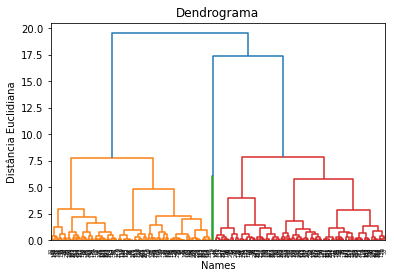

In [116]:
dendrograma = dendrogram(linkage(df_c, method = 'ward'))
plt.title('Dendrograma')
plt.xlabel('Names')
plt.ylabel('Distância Euclidiana')

hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
previsoes = hc.fit_predict(df_c)

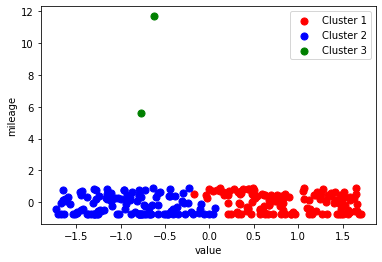

In [117]:
# A seguir podemos criar o scatterplot dividindo os pontos em 3 clusters:    

plt.scatter(df_c[previsoes == 0, 0], df_c[previsoes == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(df_c[previsoes == 1, 0], df_c[previsoes == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(df_c[previsoes == 2, 0], df_c[previsoes == 2, 1], s = 50, c = 'green', label = 'Cluster 3')

plt.xlabel('value')
plt.ylabel('mileage')
plt.legend()